In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [457]:
df = pd.read_csv('Data/cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 2.0 - EDA uppvärmning

### a)

Text(-0.16, -0.48, '34979')

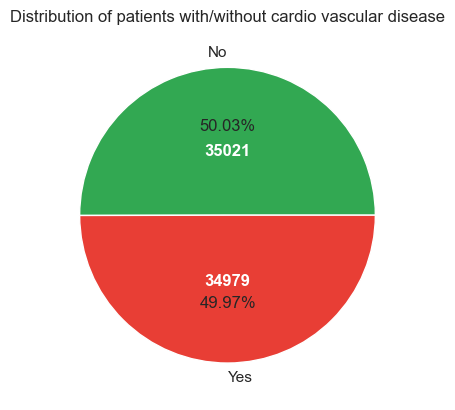

In [458]:
cardio_distribution = df['cardio'].value_counts()

# Create the pie chart
plt.pie(
    x=cardio_distribution,
    labels=['No', 'Yes'],
    autopct='%1.2f%%',
    colors=["#32a852", "#e83e35"]
);

plt.title('Distribution of patients with/without cardio vascular disease')

# Add the value count to each slice
plt.text(-0.16, 0.4, f'{cardio_distribution[0]}', color='white', fontweight='bold')
plt.text(-0.16, -0.48, f'{cardio_distribution[1]}', color='white', fontweight='bold')

### b)

Text(0.5, 1.0, 'Distribution of patient cholesterol status')

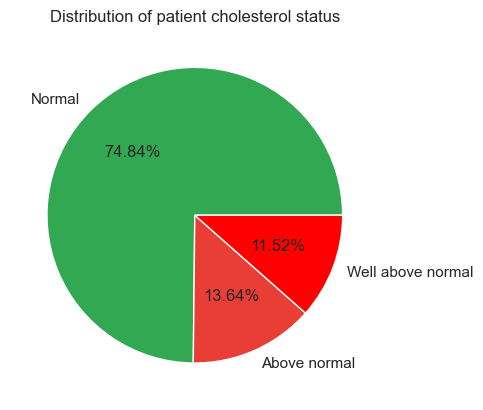

In [459]:
plt.pie(
    x=df['cholesterol'].value_counts(),
    labels=['Normal', 'Above normal', 'Well above normal'],
    colors=["#32a852", "#e83e35", 'red'],
    autopct='%1.2f%%'
);

plt.title('Distribution of patient cholesterol status')

### c)

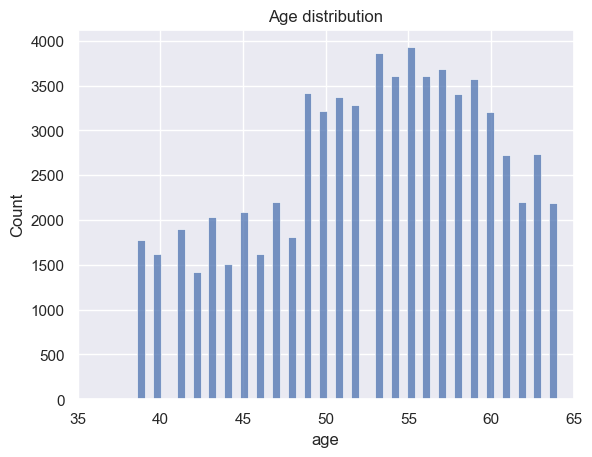

In [460]:
ax = sns.histplot(x=df['age'].div(365).astype('int'))
ax.set_title("Age distribution")
ax.set_xlim(35, 65);

### d)

Text(0.5, 1.0, 'Distribution of smokers vs none smoker')

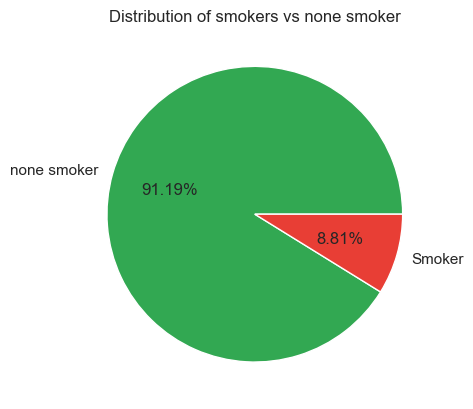

In [461]:
plt.pie(
    x=df['smoke'].value_counts(),
    labels=['none smoker', 'Smoker'],
    colors=["#32a852", "#e83e35"],
    autopct='%1.2f%%'
);

plt.title('Distribution of smokers vs none smoker')

### e)

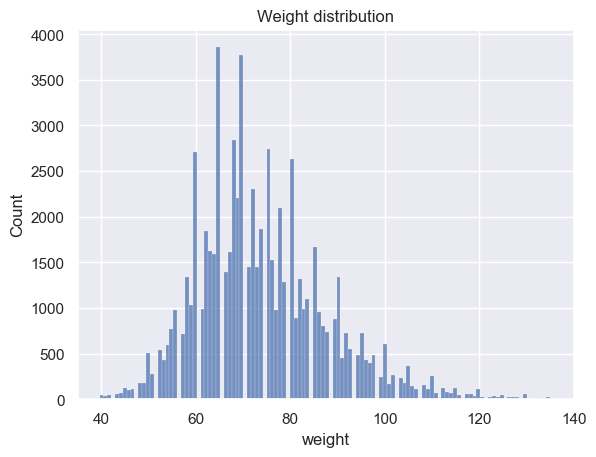

In [462]:
ax = sns.histplot(data=df, x='weight')
ax.set_title("Weight distribution")
ax.set_xlim(35, 140);

### f)

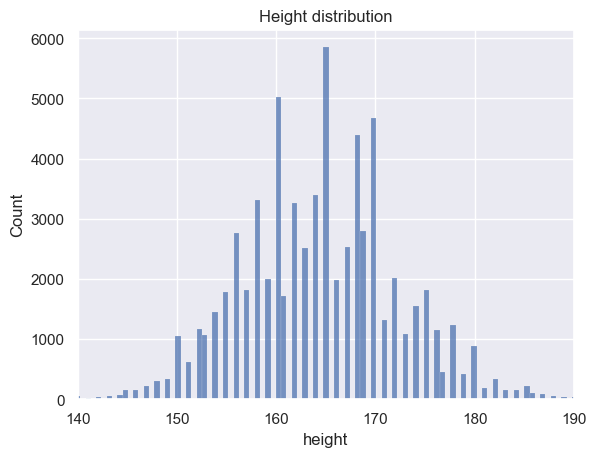

In [463]:
ax = sns.histplot(data=df, x='height')
ax.set_title("Height distribution")
ax.set_xlim(140, 190);

### g)

In [464]:
gender_cardio = df.groupby('gender', as_index=False)['cardio'].value_counts()
display(gender_cardio)

gender_cardio = gender_cardio['count']

,gender,cardio,count
0,1,0,22914
1,1,1,22616
2,2,1,12363
3,2,0,12107


In [465]:
# Female/male cardio cases divided by total patient count
female_cardio_proportion = int(gender_cardio[2] / sum(gender_cardio[0:2]) * 100)
male_cardio_proportion = int(gender_cardio[3] / sum(gender_cardio[2:4]) * 100)

test = np.array((male_cardio_proportion, female_cardio_proportion))

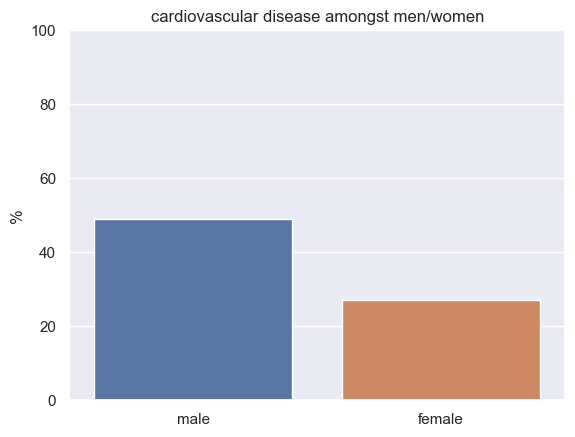

In [466]:
ax = sns.barplot(x=['male', 'female'], y=test)
ax.set_title("cardiovascular disease amongst men/women")
ax.set_ylabel("%")
ax.set_ylim(0, 100);

### 2.1.0 - Feature engineering BMI

In [476]:
# * 100 to get meters and converting to int in order to round
bmi = (df["weight"] / (df["height"] / 100)**2).astype(int)

df.insert(
    loc=5,
    column="bmi",
    value=bmi,
    allow_duplicates=1
)

df.head()

,id,age,gender,height,weight,bmi,bmi,bmi-feature,ap_hi,ap_lo,bp-feature,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21,21,normal,110,80,stage 1 hypertension,1,1,0,0,1,0
1,1,20228,1,156,85.0,34,34,obese (class I),140,90,stage 2 hypertension,3,1,0,0,1,1
2,2,18857,1,165,64.0,23,23,normal,130,70,stage 1 hypertension,3,1,0,0,0,1
3,3,17623,2,169,82.0,28,28,overweight,150,100,stage 2 hypertension,1,1,0,0,1,1
4,4,17474,1,156,56.0,23,23,normal,100,60,healthy,1,1,0,0,0,0


### a)

##### So lets take a look at what sorta BMI numbers we've actually got. At first glance, it appears as though BMI values <10 >75 are extraordinary. Lets do some more digging!

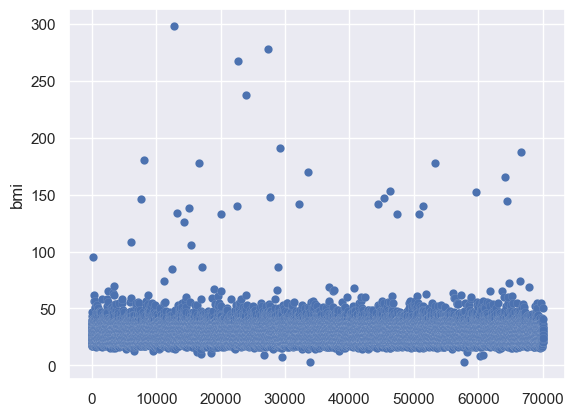

In [468]:
sns.scatterplot(df['bmi'], linewidth=0.05);

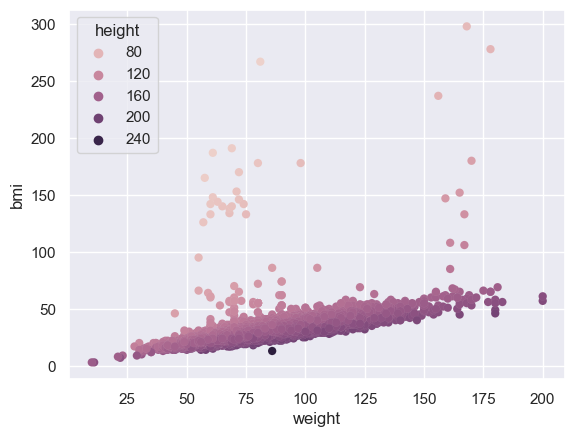

In [469]:
sns.scatterplot(
    data=df,
    y='bmi',
    x='weight',
    hue='height',
    linewidth=0.025
);

,height,weight,bmi
224,76,55.0,95
6153,122,161.0,108
7598,70,72.0,146
8171,97,170.0,180
12435,137,161.0,85
12770,75,168.0,298
13265,71,68.0,134
14323,67,57.0,126
15167,70,68.0,138
15366,125,167.0,106


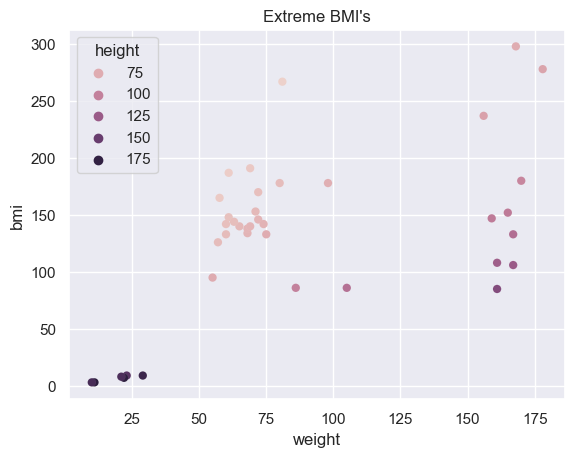

In [470]:
extreme_bmis = df.loc[
    (df['bmi'] < 10) |
    (df['bmi'] > 75)
]

ax = sns.scatterplot(
    data=extreme_bmis,
    y='bmi',
    x='weight',
    hue='height',
    linewidth=0.025
);

ax.set_title("Extreme BMI's")

extreme_bmis[['height', 'weight', 'bmi']].iloc[:10]

##### Having taken a look at the basic graphs and gone through the actual data for patients with BMI's <10 >75, i'm confident that such values are indeed outliars and or unresonable. However in order to more closely represent real world values, i also googled a bunch and came to the conclusion that a range of <18 >60 would be more suitable.

In [471]:
df = df.loc[
    (df['bmi'] >= 18) &
    (df['bmi'] <= 60)
]

df.head()

,id,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,34,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,23,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,28,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,23,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,26,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,50,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,31,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,27,135,80,1,2,0,0,0,1


### b)

In [472]:
# Self explanatory
def assign_bmi_feature(bmi):
    # values below 18 aren't present because we dropped them
    if 18.5 < bmi < 24.9:
        return 'normal'
    
    elif 25 < bmi < 29.9:
        return 'overweight'
    
    elif 30 < bmi < 34.9:
        return 'obese (class I)'
    
    elif 35 < bmi < 39.9:
        return 'obese(class II)'
    
    elif 40 <= bmi:
        return 'obese (class III)'

# Apply assign_bmi_feature() to each row bmi value, take returns and create a series
bmi_feature = df['bmi'].apply(assign_bmi_feature)
df.insert(loc=6, column='bmi-feature', value=bmi_feature, allow_duplicates=True)
df.head()

,id,age,gender,height,weight,bmi,bmi-feature,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21,normal,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,34,obese (class I),140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,23,normal,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,28,overweight,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,23,normal,100,60,1,1,0,0,0,0


### 2.1.1 - Feature engineering blodtryck

##### Just like before, i first took a look at the distribution of the data

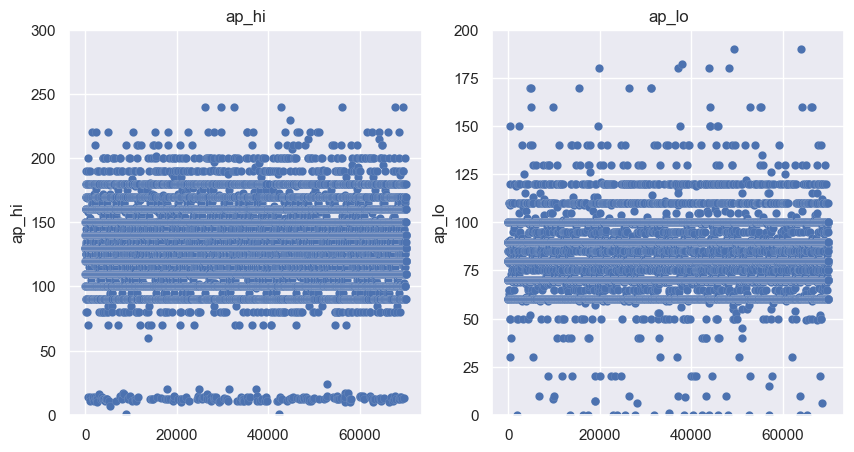

In [473]:
# A true engineer complicates things every once in a while for the fun of it...

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

metrics = {
    'ap_hi': 300,
    'ap_lo': 200
}

# enumerate and create two plots with diff bp's and y limits
for i, (index, val) in enumerate(metrics.items()):
    sns.scatterplot(
        data=df[index],
        ax=axes[i],
        linewidth=0.05
    )
    
    axes[i].set_title(index)
    axes[i].set_ylim(0, val)
    

##### Than togeather with data provided by the table (from the lab pdf) and google, made an educated guess as to where i'd like to place my cutoffs. In this case, ap_hi >80 <210 and ap_lo >40 <130 sounded resonable to me

In [474]:
# clean this up some more?
df = df.loc[
    (df['ap_hi'] >= 80) &
    (df['ap_hi'] <= 210) &
    
    (df['ap_lo'] >= 40) &
    (df['ap_lo'] <= 130)
]

df

,id,age,gender,height,weight,bmi,bmi-feature,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21,normal,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,34,obese (class I),140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,23,normal,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,28,overweight,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,23,normal,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,26,overweight,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,50,obese (class III),140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,31,obese (class I),180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,27,overweight,135,80,1,2,0,0,0,1


In [475]:
# Self explanatory

def assign_bp_feature(ap_hi, ap_lo):
    
    if (ap_hi < 120) & (ap_lo < 80):
        return 'healthy'
    
    if (120 <= ap_hi <= 129) & (ap_lo < 80):
        return 'elevated'
    
    if (130 <= ap_hi <= 139) | (80 <= ap_lo <= 89):
        return 'stage 1 hypertension'
    
    if (ap_hi >= 140) | (ap_lo >= 90):
        # Nested because values can be above 180, which would trigger the first if statement but not the second one
        if (ap_hi > 180) | (ap_lo > 120):
            return 'hypertension crises'
        
        return 'stage 2 hypertension'

# Apply assign_bp_feature() to each row bmi value, take returns and create a series
bp_feature = df.apply(
    lambda row: assign_bp_feature(row['ap_hi'], row['ap_lo']),
    axis=1
)

df.insert(loc=9, column='bp-feature', value=bp_feature, allow_duplicates=True)

df

,id,age,gender,height,weight,bmi,bmi-feature,ap_hi,ap_lo,bp-feature,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21,normal,110,80,stage 1 hypertension,1,1,0,0,1,0
1,1,20228,1,156,85.0,34,obese (class I),140,90,stage 2 hypertension,3,1,0,0,1,1
2,2,18857,1,165,64.0,23,normal,130,70,stage 1 hypertension,3,1,0,0,0,1
3,3,17623,2,169,82.0,28,overweight,150,100,stage 2 hypertension,1,1,0,0,1,1
4,4,17474,1,156,56.0,23,normal,100,60,healthy,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,26,overweight,120,80,stage 1 hypertension,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,50,obese (class III),140,90,stage 2 hypertension,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,31,obese (class I),180,90,stage 2 hypertension,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,27,overweight,135,80,stage 1 hypertension,1,2,0,0,0,1
